<a href="https://colab.research.google.com/github/kuan9307/Kaggle-AI-Challenge-House-Prices---Advanced-Regression-Techniques/blob/main/%20House%20Prices%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0) Import modules and dataset
Kaggle website: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
# Dowmload the training data
!gdown 1yrHdZL7UqbtbTTioFVnPZ-6Rq4lVoDIN
os.listdir()[1]
Train_raw_data = pd.read_csv("train.csv")

Downloading...
From: https://drive.google.com/uc?id=1yrHdZL7UqbtbTTioFVnPZ-6Rq4lVoDIN
To: /content/train.csv
100% 461k/461k [00:00<00:00, 94.3MB/s]


In [ ]:
# Dowmload the testing data
!gdown 1rfaJgG7P7svPTHr-R6yzDroZ1A3jVYra
os.listdir()[1]
Test_raw_data = pd.read_csv("test.csv")

Downloading...
From: https://drive.google.com/uc?id=1rfaJgG7P7svPTHr-R6yzDroZ1A3jVYra
To: /content/test.csv
100% 372k/372k [00:00<00:00, 130MB/s]


In [ ]:
Train_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#1) Pre-process data (Data Cleansing) [20 points]

1. Check to see if data has gaps Nulls, N/A, None.
2. Do you have anomalies (outliers) in the features? If so, please remove them as needed. By 'anomaly,' we mean extreme points. For instance, if there is a feature that changes from 10 to 100, a value exceeding 10,000 would be considered an extreme point.
3. Analyze the labels

  Provide the histogram of the regression label
  
  Provide the count of the numbers of record of each class

4. Encode columns that contains text

5. Normalize numerical columns

##1. Check to see if data has gaps Nulls, N/A, None.

In [ ]:
df_train = Train_raw_data.drop(labels=["Id"],axis=1).copy()
df_traget = Train_raw_data['SalePrice']
# missing data
# get is null and sum them all and then sort with ascending
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
#Remove the feature that contains more than 10% null data.
df_train = df_train.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageYrBlt'], axis=1)

The feature which has nulls is listed below:
1. PoolQC: Pool quality, Null means no pool
2. MiscFeature: Miscellaneous feature not covered in other categories
3. Alley: Type of alley access to property, Null means no alley access
4. Fence: Fence quality,Null means no Fence
5. FireplaceQu: Fireplace quality, Null means no fireplace
6. LotFrontage: Linear feet of street connected to property
7. GarageYrBlt: Year garage was built
8. GarageCond: Garage condition, NA means no garage
9. GarageType: Garage location, NA means no garage
10. GarageFinish: Interior finish of the garage, NA means no garage
11. GarageQual: Garage quality, NA means no garage
12. BsmtFinType2: Rating of basement finished area, NA means no garage
13. BsmtExposure: Refers to walkout or garden level walls
14. BsmtQual: Evaluates the height of the basement
15. BsmtCond: Evaluates the general condition of the basement
16. BsmtFinType1: Rating of basement finished area
17. MasVnrArea: Masonry veneer area in square feet
18. MasVnrType: Masonry veneer type, None means None
19. Electrical: Electrical system

In [ ]:
#Replace Null with different label according to the Kaggle website discription
df_train["GarageCond"] = df_train["GarageCond"].fillna(value = 'no garage')
df_train["GarageType"] = df_train["GarageType"].fillna(value = 'no garage')
df_train["GarageFinish"] = df_train["GarageFinish"].fillna(value = 'no garage')
df_train["GarageQual"] = df_train["GarageQual"].fillna(value = 'no garage')
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna(value = 'no Basement')
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna(value = 'no Basement')
df_train["BsmtQual"] = df_train["BsmtQual"].fillna(value = 'no Basement')
df_train["BsmtCond"] = df_train["BsmtCond"].fillna(value = 'no Basement')
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna(value = 'no Basement')
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(value = 0)
df_train["MasVnrType"] = df_train["MasVnrType"].fillna(value = 'No Masonry veneer')
df_train["Electrical"] = df_train["Electrical"].fillna(value = 'No Fence')

In [ ]:
#Check there is no null in the dataset
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
After_fillNa_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
After_fillNa_data.head(5)

,Total,Percent
MSSubClass,0,0.0
HeatingQC,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0


##3. Analyze the labels

Provide the count of the numbers of record of each class

In [ ]:
import seaborn as sns

print(df_train['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [ ]:
import pandas as pd
# Categorize the data into into four different categories base on the house price.
# Define the threshold for classification.
bins = [34899, 129900, 163000, 214000, 755001]

# Create labels according to the saleprice
labels = [1, 2, 3, 4]

# Use pd.cut to categorize the 'Target' column into four different categories.
df_train['Target_Class'] = pd.cut(df_train['SalePrice'], bins=bins, labels=labels, right=False)

#Check whether there is any null value in the dataset
df_train[df_train['Target_Class'].isnull()].index.tolist()

[]

Class 1 (34899 ~ 129900): 361
Class 2 (129900 ~ 163000): 367
Class 3 (163000 ~ 214000): 365
Class 4 (214000 ~ 625001): 367


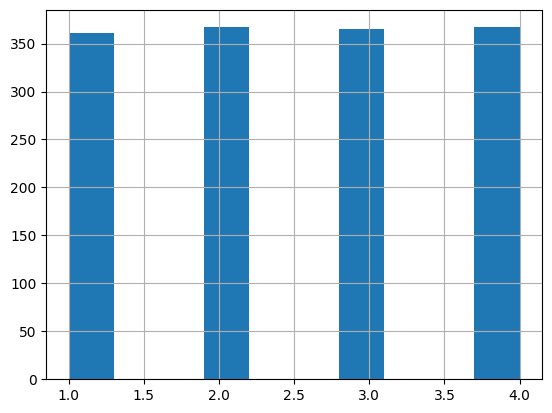

In [ ]:
df_train['Target_Class'].hist()
class_counts = df_train['Target_Class'].value_counts()
print(f"Class 1 (34899 ~ 129900): {class_counts[1]}")
print(f"Class 2 (129900 ~ 163000): {class_counts[2]}")
print(f"Class 3 (163000 ~ 214000): {class_counts[3]}")
print(f"Class 4 (214000 ~ 625001): {class_counts[4]}")

Provide the histogram of the regression label

<ipython-input-12-03e86d880557>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


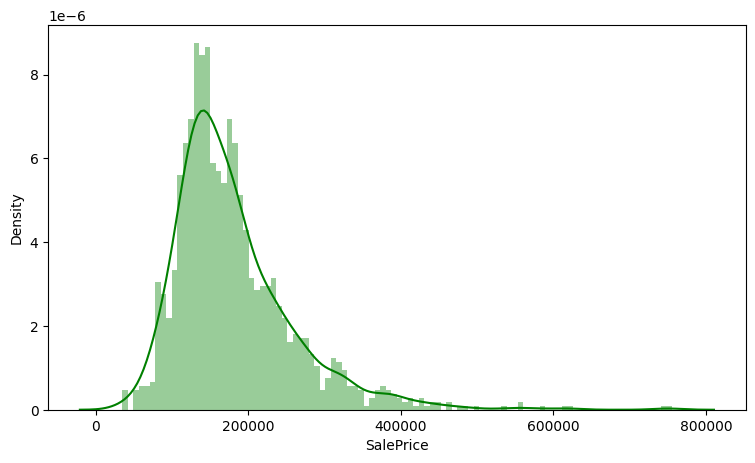

In [ ]:
plt.figure(figsize=(9, 5))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

## Encode columns that contains text

In [ ]:
#Devide the feature with its datatype
feature_with_value = df_train.select_dtypes(include=['number'])
feature_with_value_index = feature_with_value.columns
feature_with_string = df_train.select_dtypes(include=['object'])
feature_with_string_index = feature_with_string.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in feature_with_string_index:
  df_train[column]=le.fit_transform(df_train[column])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   int64   
 2   LotArea        1460 non-null   int64   
 3   Street         1460 non-null   int64   
 4   LotShape       1460 non-null   int64   
 5   LandContour    1460 non-null   int64   
 6   Utilities      1460 non-null   int64   
 7   LotConfig      1460 non-null   int64   
 8   LandSlope      1460 non-null   int64   
 9   Neighborhood   1460 non-null   int64   
 10  Condition1     1460 non-null   int64   
 11  Condition2     1460 non-null   int64   
 12  BldgType       1460 non-null   int64   
 13  HouseStyle     1460 non-null   int64   
 14  OverallQual    1460 non-null   int64   
 15  OverallCond    1460 non-null   int64   
 16  YearBuilt      1460 non-null   int64   
 17  YearRemodAdd   1460 non-null   in

## 2. Remove extreme points as needed.

First, examine the histograms for any extreme values in each feature.

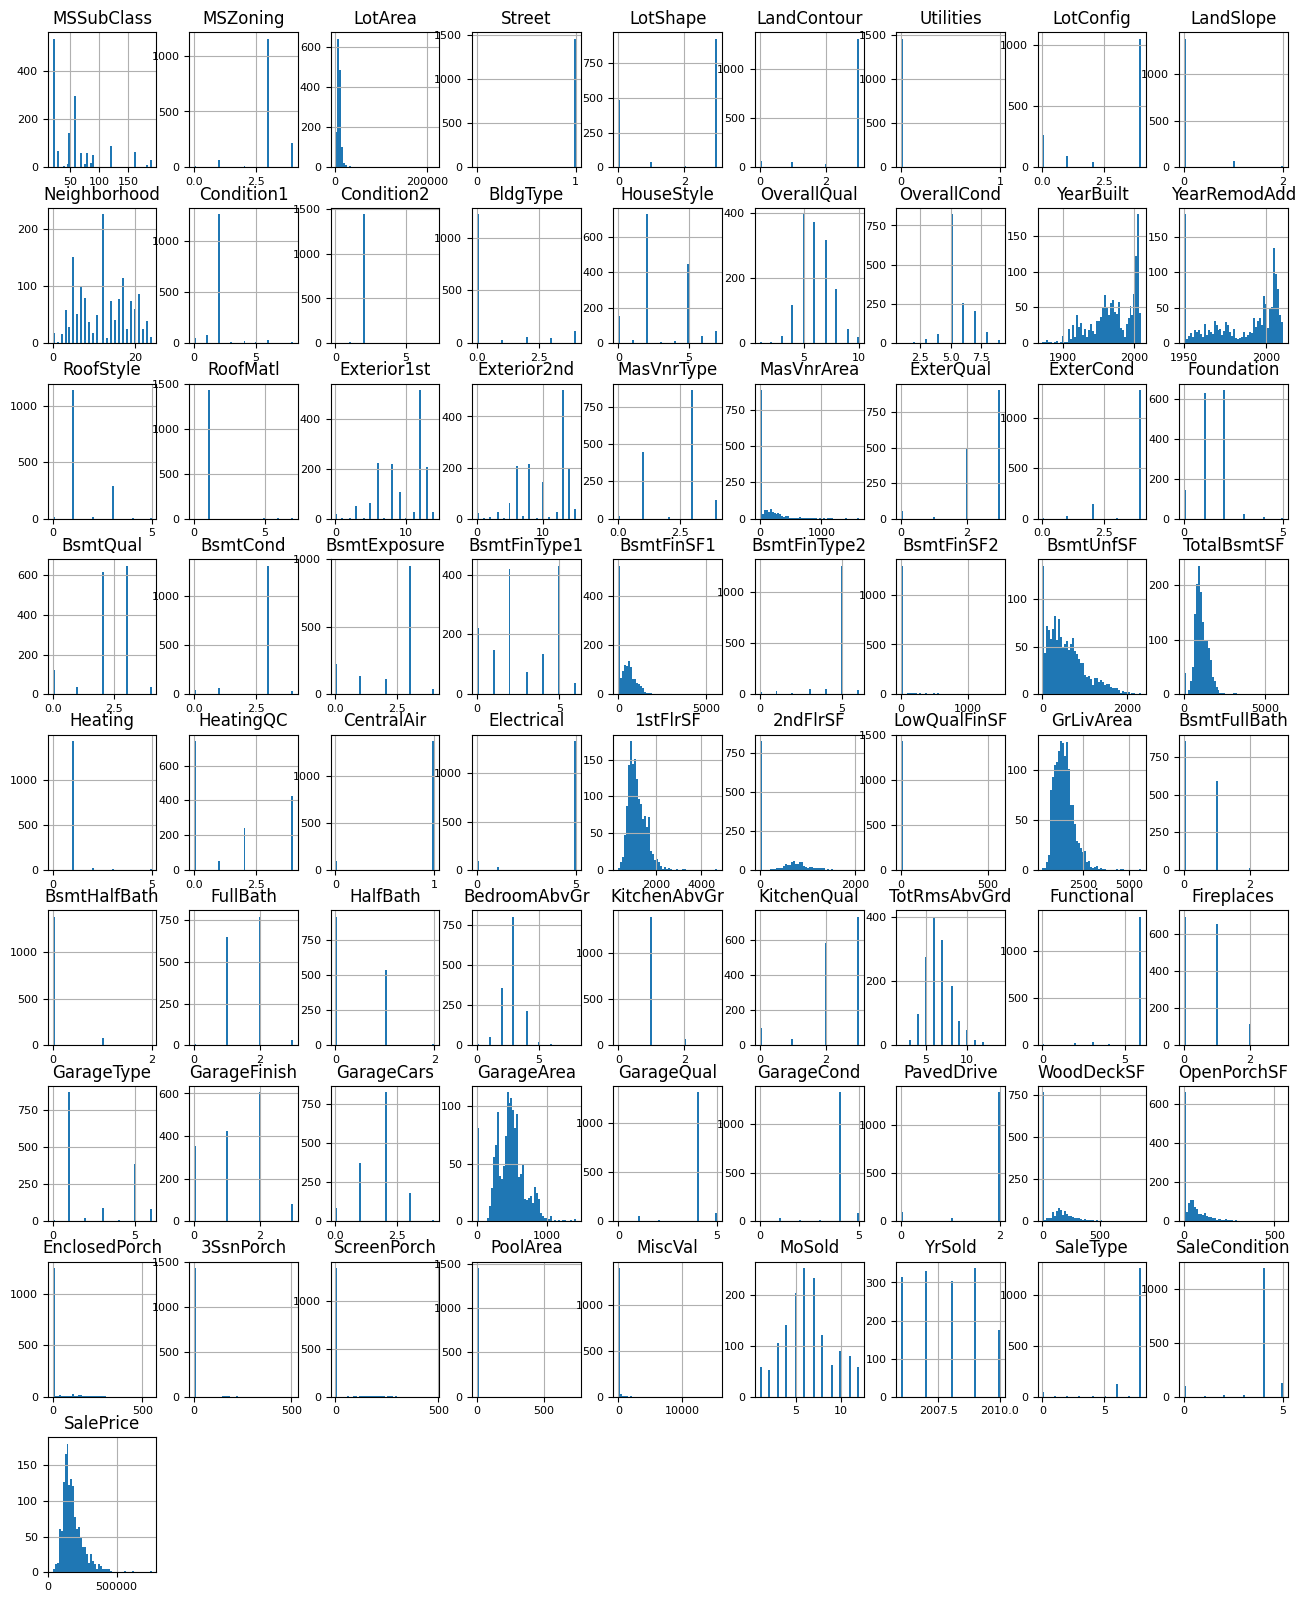

In [ ]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

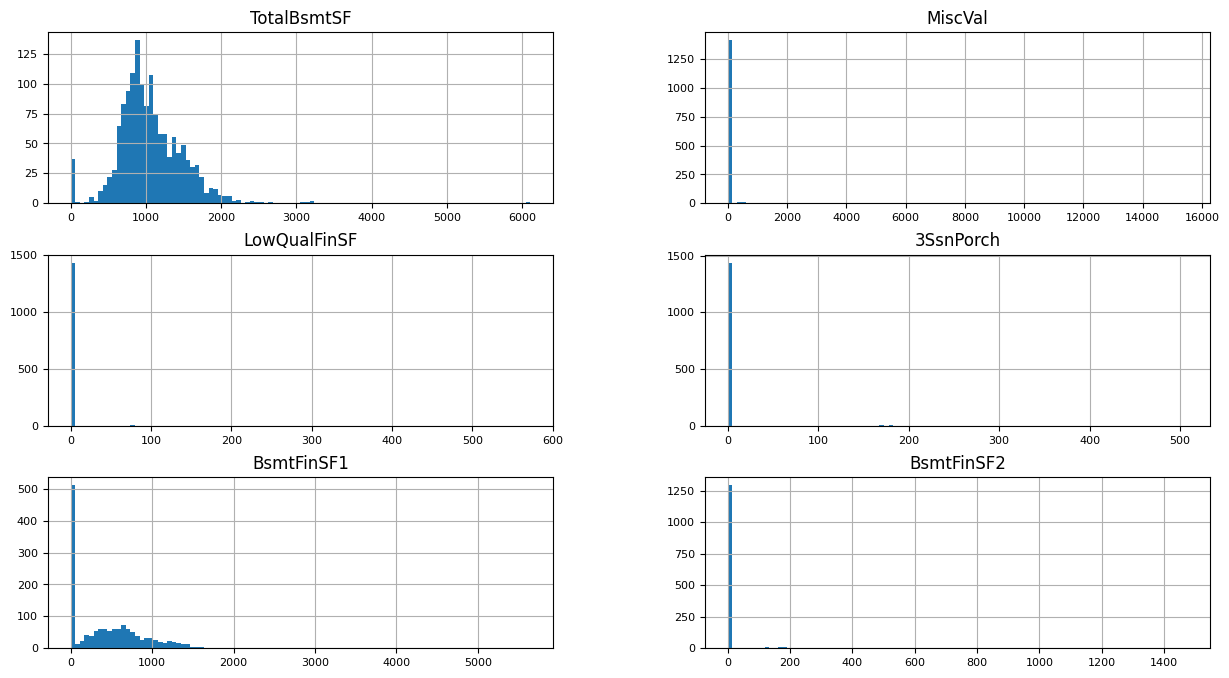

In [ ]:
#Get a close look at the distripution of the extreme value
Remove_extreme = pd.concat([df_train['TotalBsmtSF'],df_train['MiscVal'],
                            df_train['LowQualFinSF'],df_train['3SsnPorch'],
                            df_train['BsmtFinSF1'],df_train['BsmtFinSF2']]
                           ,axis=1)
Remove_extreme.hist(figsize=(15, 8), bins=100, xlabelsize=8, ylabelsize=8);

In [ ]:
#Determine the threhold value and see how many extreme data in the feature
print(df_train[df_train['TotalBsmtSF'] > 6000].shape)
print(df_train[df_train['MiscVal'] > 10000].shape)
print(df_train[df_train['LowQualFinSF'] > 100].shape)
print(df_train[df_train['3SsnPorch'] > 300].shape)
print(df_train[df_train['BsmtFinSF1'] > 3000].shape)
print(df_train[df_train['BsmtFinSF2'] > 1000].shape)

(1, 74)
(1, 74)
(22, 74)
(4, 74)
(1, 74)
(10, 74)


In [ ]:
#Remove the data which has extreme points in TotalBsmtSF and SalePrice
df_train = df_train[df_train['TotalBsmtSF'] <= 6000]
df_train = df_train[df_train['MiscVal'] <= 10000]
df_train = df_train[df_train['LowQualFinSF'] <= 100]
df_train = df_train[df_train['3SsnPorch'] <= 300]
df_train = df_train[df_train['BsmtFinSF1'] <= 3000]
df_train = df_train[df_train['BsmtFinSF2'] <= 1000]

In [ ]:
df_train[df_train['Target_Class'].isnull()].index.tolist()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1422 non-null   int64   
 1   MSZoning       1422 non-null   int64   
 2   LotArea        1422 non-null   int64   
 3   Street         1422 non-null   int64   
 4   LotShape       1422 non-null   int64   
 5   LandContour    1422 non-null   int64   
 6   Utilities      1422 non-null   int64   
 7   LotConfig      1422 non-null   int64   
 8   LandSlope      1422 non-null   int64   
 9   Neighborhood   1422 non-null   int64   
 10  Condition1     1422 non-null   int64   
 11  Condition2     1422 non-null   int64   
 12  BldgType       1422 non-null   int64   
 13  HouseStyle     1422 non-null   int64   
 14  OverallQual    1422 non-null   int64   
 15  OverallCond    1422 non-null   int64   
 16  YearBuilt      1422 non-null   int64   
 17  YearRemodAdd   1422 non-null   in

##Normalize numerical columns

In [ ]:
df_train['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1459    147500
Name: SalePrice, Length: 1422, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
df_traget = df_train['SalePrice']
scaler = StandardScaler()
df_train_N = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_train_N.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Target_Class
0,0.073906,-0.040231,-0.200364,0.065094,0.751004,0.310693,-0.026528,0.602018,-0.224429,-1.199908,...,-0.110642,-0.269691,-0.058919,-0.112487,-1.601629,0.138121,0.315506,0.204346,0.347500,0.440422
1,-0.870764,-0.040231,-0.084826,0.065094,0.751004,0.310693,-0.026528,-0.634184,-0.224429,1.959849,...,-0.110642,-0.269691,-0.058919,-0.112487,-0.491548,-0.614400,0.315506,0.204346,0.007110,0.440422
2,0.073906,-0.040231,0.080946,0.065094,-1.377756,0.310693,-0.026528,0.602018,-0.224429,-1.199908,...,-0.110642,-0.269691,-0.058919,-0.112487,0.988560,0.138121,0.315506,0.204346,0.536606,1.336388
3,0.310074,-0.040231,-0.089850,0.065094,-1.377756,0.310693,-0.026528,-1.870386,-0.224429,-1.033605,...,-0.110642,-0.269691,-0.058919,-0.112487,-1.601629,-1.366920,0.315506,-3.462282,-0.516083,-0.455544
4,0.073906,-0.040231,0.383354,0.065094,-1.377756,0.310693,-0.026528,-0.634184,-0.224429,0.463122,...,-0.110642,-0.269691,-0.058919,-0.112487,2.098641,0.138121,0.315506,0.204346,0.870693,1.336388


After encoding all the features and filling all the null values with specific values, I selected the top 15 features that have a higher linear correlation with SalePrice.

In [ ]:
correlation_matrix = df_train_N.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
selected_feature = correlation_with_target.index
df_train_SF = df_train_N[selected_feature[0:23]]

#2) Data Visualization [10 points]:
Present some graphs to explore the data visually, and analyze labels or data trends. This data visualization step helps you have a basic understanding of the data to define a reasonable problem statement. For every plot, you must have an explanation of what the plot tells you, why you've created it and how you are going to use it.

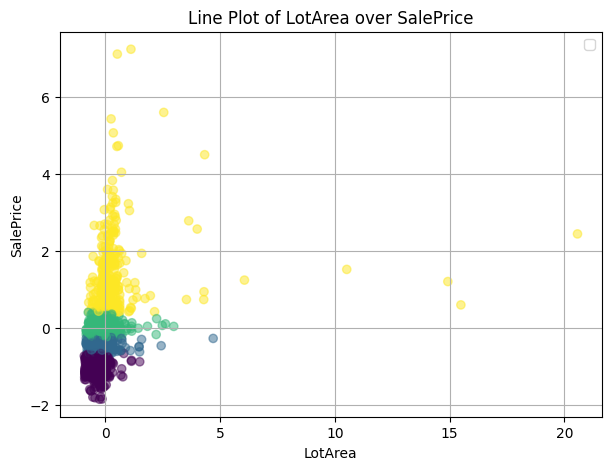

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(df_train_SF['LotArea'], df_train_SF['SalePrice'], c = df_train_SF['Target_Class'], alpha=0.5)
plt.title('Line Plot of LotArea over SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()

The scatter plot depicts the relationship between the "LotArea" feature and sale price. The figure illustrates that most of the data points are clustered around X = 0. Since the dataset doesn't vary much in the direction of the X-axis, this feature will be dropped.

In [ ]:
df_train_SF = df_train_SF.drop(labels=["LotArea"],axis=1)

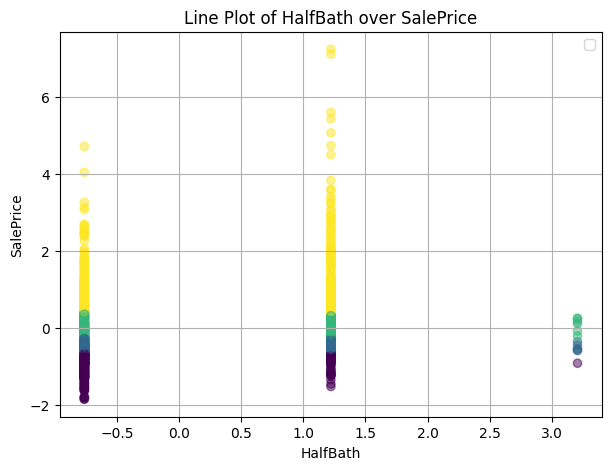

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(df_train_SF['HalfBath'], df_train_SF['SalePrice'],c = df_train_SF['Target_Class'], alpha=0.5)
plt.title('Line Plot of HalfBath over SalePrice')
plt.xlabel('HalfBath')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()

The figure above depicts the relationship between the "Halfbath" feature and the sale price. The diagram indicates a few data clusters around x = 3.2. Furthermore, the colors are similarly distributed at X = -0.5 and X = 1.2, suggesting that the sale price does not change with variations in the x-value. Therefore, the "HalfBath" feature will be dropped.

In [ ]:
df_train_SF = df_train_SF.drop(labels=["HalfBath"],axis=1)

In [ ]:
df_train_SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1422 non-null   float64
 1   Target_Class  1422 non-null   float64
 2   OverallQual   1422 non-null   float64
 3   GrLivArea     1422 non-null   float64
 4   TotalBsmtSF   1422 non-null   float64
 5   GarageCars    1422 non-null   float64
 6   GarageArea    1422 non-null   float64
 7   1stFlrSF      1422 non-null   float64
 8   FullBath      1422 non-null   float64
 9   TotRmsAbvGrd  1422 non-null   float64
 10  YearBuilt     1422 non-null   float64
 11  YearRemodAdd  1422 non-null   float64
 12  MasVnrArea    1422 non-null   float64
 13  Fireplaces    1422 non-null   float64
 14  BsmtFinSF1    1422 non-null   float64
 15  Foundation    1422 non-null   float64
 16  WoodDeckSF    1422 non-null   float64
 17  2ndFlrSF      1422 non-null   float64
 18  OpenPorchSF   1422 non-null 

#3) Problem statement [10 points]: You have to answer following:

#Classification:
1. Specify the ranges you have used to create your classification label.
2. How are you going to compare the performance of the classification models? F-1 Score, confusion matrix

##Regression:



###1. What column is your label and what columns are your features?

In [ ]:
print(f"The features are {df_train_SF.drop(labels=['SalePrice','Target_Class'],axis=1).columns}")
print(f"The label are 'SalePrice' ")

The features are Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'Foundation', 'WoodDeckSF',
       '2ndFlrSF', 'OpenPorchSF', 'CentralAir', 'Electrical'],
      dtype='object')
The label are 'SalePrice' 


###2. Does it make sense to predict the label using the features?

Here is the Feature discription:

 1.   OverallQual   Rates the overall material and finish of the house
 2.   GrLivArea     Above grade (ground) living area square feet
 3.   GarageCars    Size of garage in car capacity
 4.   GarageArea    Size of garage in square feet
 5.   TotalBsmtSF   Total square feet of basement area
 6.   1stFlrSF      First Floor square feet
 7.   FullBath      Full bathrooms above grade
 8.   TotRmsAbvGrd  Total rooms above grade (does not include bathrooms)
 9.   YearBuilt     Original construction date
 10.  YearRemodAdd  Remodel date (same as construction date if no remodeling or additions)
 11.  MasVnrArea    Masonry veneer area in square feet
 12.  Fireplaces    Number of fireplaces
 13.  BsmtFinSF1    Basement finished square feet
 14.  Foundation    Type of foundation
 15.  WoodDeckSF    Wood deck area in square feet

 As you can see in the list, most of the features are related to space, how many rooms in the house, and the quailty of the property. It is resonable to use these features to predict the house price.

###3. How are you going to compare the performance of the regression models?

I will employ the Root Mean Squared Error (RMSE) to assess the model's performance. This metric is also utilized in Kaggle challenges.

##Classification



###1. Specify the ranges you have used to create your classification label.

Class 1: The house price of this class range from 34899 to 129900.

Class 2: The house price of this class range from 129900 to 163000.

Class 3: The house price of this class range from 163000 to 214000.

Class 4: The house price of this class range from 214000 to 625001.

###2. How are you going to compare the performance of the classification models?

I will use the F1 Score for the overall evaluation of the model. To assess how the model performs in each class, I will utilize a confusion matrix.

#4) Features Selection/Extraction [10 points]:
even though in the course we did not talk much about feature engineering and feature selection, you need to do simple feature selection in your model (Or go beyond simple methods if you know more!). Here are some examples:

In one of the lectures, we learned about a correlation plot using Seaborn.
1. Using that plot we can see if two features are highly correlated (linearly) and hence, we can just use one of them in our model given that they are saying the same thing (kinda!)
2. Or let's say, you have a feature that does not change at all. It is zero all the time! then we don't use it for our model because it does not help the model learn anything.

One other way is to build your model step by step. Let's say in terms of classification, you build your train your model only using a subsection of features and see if the result is close to the result you get if you use all features?! The idea is to train a non-linear model with the minimum number of features with an acceptable result.


<Axes: >

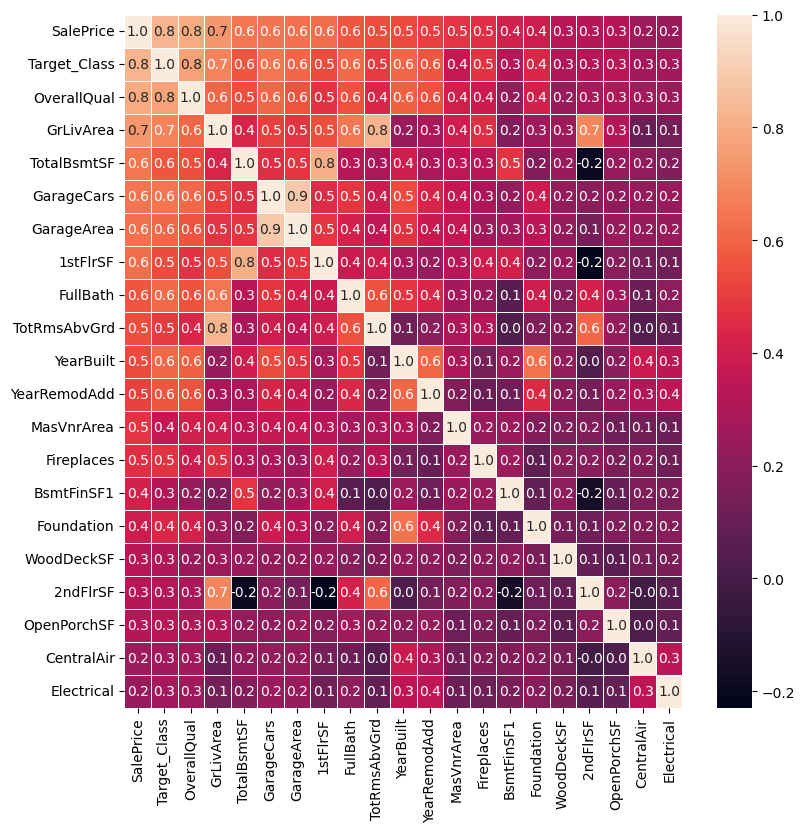

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_train_SF.corr(),annot=True, linewidths=.5, fmt= '.1f',ax=ax)

According to the heatmap, fours pairs of features appear to be dependent on each other:

1. TotRmsAbvGrd and GrLivArea
2. 1stFlrSF and TotalBsmtSF
3. GarageCars and GarageArea
4. GrLivArea and 2ndFlrSF

I have decided to retain the features with higher correlation with the target, namely GrLivArea, TotalBsmtSF, and GarageCars.

In [ ]:
df_train_SF = df_train_SF.drop(labels=["TotRmsAbvGrd","1stFlrSF","GarageArea", "2ndFlrSF"], axis=1)

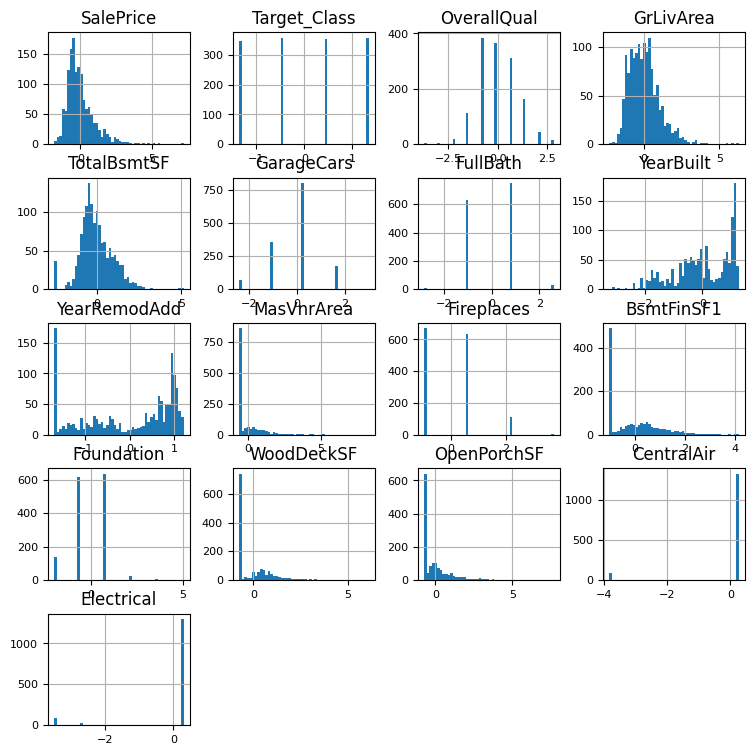

In [ ]:
df_train_SF.hist(figsize=(9, 9), bins=50, xlabelsize=8, ylabelsize=8);

After go through all the histagrams above, most of the features data are distripute seprately. Although There are some feature has high density with one specific value, the data ditripution is still meanfull. For example, a house without central air conditioning may have a lower price.

#5) Comparing different models (Features are fixed) [20 points]:

After step 4, you selected your features and now, you will train different models and compare their results:

In [ ]:
# Stored the accuracy of each model
Regression_Accuracy = [] #pd.DataFrame()
Regression_model_name = []
Classification_Accuracy = [] #pd.DataFrame()
Classification_model_name = []

##Regression:

You can compare linear regression, polynomial regression and other model of you choice.

In [ ]:
#Split the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_SF.drop(labels=['SalePrice','Target_Class'],axis=1), df_train_SF['SalePrice'], test_size=0.2,random_state=10)

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression

Linear_reg = LinearRegression().fit(X_train, y_train)
y_Linear_predicted = Linear_reg.predict(X_test)

import math
from sklearn.metrics import mean_squared_error
RMS_Linear_model = mean_squared_error(y_test, y_Linear_predicted, squared=False)
Regression_model_name.append("Linear regression")
Regression_Accuracy.append(RMS_Linear_model)
print(RMS_Linear_model)

0.4514154472862319


In [ ]:
#Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)


model = LinearRegression()
model.fit(X_poly_train , y_train)

X_poly_test = poly.transform(X_test)
y_poly_predicted = model.predict(X_poly_test)

RMS_ploy_model = mean_squared_error(y_test, y_poly_predicted, squared=False)
Regression_model_name.append("Polynomial Regression")
Regression_Accuracy.append(RMS_ploy_model)
print(f"Polynomial regression RMSE: {RMS_ploy_model}")

Polynomial regression RMSE: 0.40221492533694453


##Classification:

You can compare models like logistic regression, linear classifier, MLP classifier and other model of your choice.



In [ ]:
import tensorflow as tf

le2 = LabelEncoder()
Traget = le2.fit_transform(df_train_SF['Target_Class'])

X_train, X_test, y_train, y_test = train_test_split(df_train_SF.drop(labels=['SalePrice','Target_Class'],axis=1),
                                                    Traget, test_size=0.2, random_state=10)

Accuracy: 0.712280701754386

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.74      0.68        62
           1       0.69      0.47      0.56        85
           2       0.62      0.85      0.72        61
           3       0.93      0.84      0.88        77

    accuracy                           0.71       285
   macro avg       0.72      0.73      0.71       285
weighted avg       0.73      0.71      0.71       285



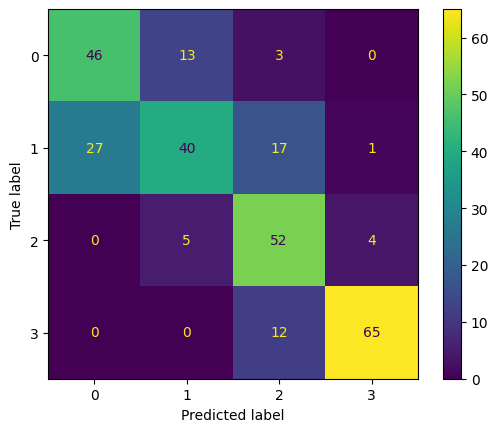

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)
y_logreg_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_logreg_pred)
Classification_model_name.append("Logistic Classifyer")
Classification_Accuracy.append(accuracy)

conf_matrix = confusion_matrix(y_test, y_logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=logreg.classes_)
classification_rep = classification_report(y_test, y_logreg_pred)

print(f'Accuracy: {accuracy}')
disp.plot()
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.3298245614035088

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.58      0.45        62
           1       0.18      0.14      0.16        85
           2       0.35      0.39      0.37        61
           3       0.43      0.29      0.34        77

    accuracy                           0.33       285
   macro avg       0.33      0.35      0.33       285
weighted avg       0.32      0.33      0.32       285



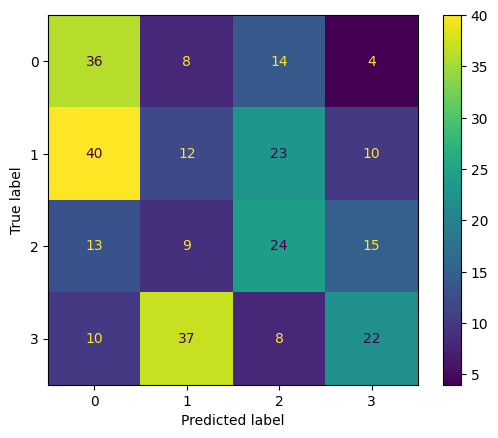

In [ ]:
from sklearn.linear_model import SGDClassifier

SGDclf = SGDClassifier(loss="squared_error", penalty="l2",max_iter = 1000)
SGDclf.fit(X_train, y_train)

y_SGDclf_pred = SGDclf.predict(X_test)

accuracy = accuracy_score(y_test, y_SGDclf_pred)
Classification_model_name.append("SGD Classifier")
Classification_Accuracy.append(accuracy)
conf_matrix = confusion_matrix(y_test, y_SGDclf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=SGDclf.classes_)
classification_rep = classification_report(y_test, y_SGDclf_pred)

print(f'Accuracy: {accuracy}')
disp.plot()
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.6947368421052632

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.73      0.68        62
           1       0.70      0.49      0.58        85
           2       0.59      0.80      0.68        61
           3       0.86      0.81      0.83        77

    accuracy                           0.69       285
   macro avg       0.70      0.71      0.69       285
weighted avg       0.71      0.69      0.69       285



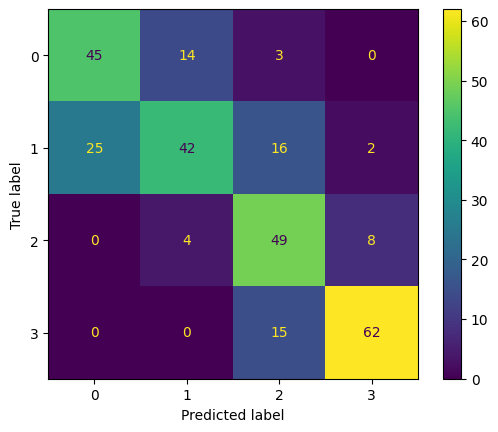

In [ ]:
from sklearn.neural_network import MLPClassifier

MLPclf = MLPClassifier(hidden_layer_sizes=(200,200,4),
                        max_iter = 1000,activation = 'relu',
                        solver = 'adam')

MLPclf.fit(X_train, y_train)
y_MLPclf_pred = MLPclf.predict(X_test)

accuracy = accuracy_score(y_test, y_MLPclf_pred)
Classification_model_name.append("MLP Classifier")
Classification_Accuracy.append(accuracy)
conf_matrix = confusion_matrix(y_test, y_MLPclf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=MLPclf.classes_)
classification_rep = classification_report(y_test, y_MLPclf_pred)

print(f'Accuracy: {accuracy}')
disp.plot()
print('\nClassification Report:')
print(classification_rep)

##The result of the regression

<ipython-input-40-d889938dc281>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=Regression_df,x="Model",y="Accuracy", ci=None)


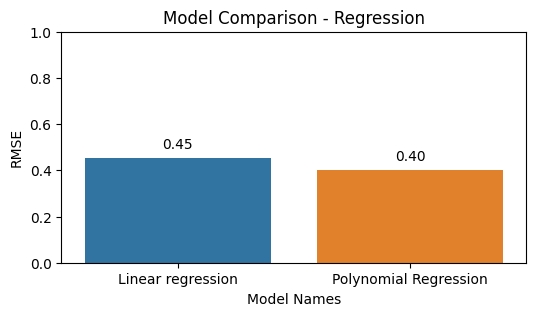

In [ ]:
import seaborn as sns
#sns.set(style="whitegrid")

Regression_df = pd.DataFrame()
Regression_df["Model"] = Regression_model_name
Regression_df["Accuracy"] = Regression_Accuracy

plt.figure(figsize=(6, 3))
ax = sns.barplot(data=Regression_df,x="Model",y="Accuracy", ci=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylim(0, 1)
plt.title('Model Comparison - Regression')
plt.xlabel('Model Names')
plt.ylabel('RMSE')

plt.show()

**In this section, I have experimented with both linear regression and polynomial regression. The polynomial regression exhibits a lower RMSE, indicating superior performance compared to the linear model.**

##The result of the classification:

<ipython-input-41-6975fa27fef1>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=Classification_df,x="Model",y="Accuracy", ci=None)


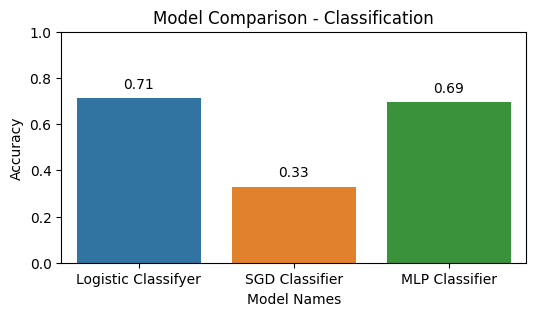

In [ ]:
import seaborn as sns
#sns.set(style="whitegrid")

Classification_df = pd.DataFrame()
Classification_df["Model"] = Classification_model_name
Classification_df["Accuracy"] = Classification_Accuracy

plt.figure(figsize=(6, 3))
ax = sns.barplot(data=Classification_df,x="Model",y="Accuracy", ci=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylim(0, 1)
plt.title('Model Comparison - Classification')
plt.xlabel('Model Names')
plt.ylabel('Accuracy')

plt.show()

**In terms of classification, the SGD model exhibits the worst performance, while the MLP and Logistic models show similar performance.**

In [ ]:
sns.despine()

<Figure size 640x480 with 0 Axes>

#6) Unsupervised + Supervised [20 points]:

##Supervised - Group the dataset features based on the distribution pattern of the data.

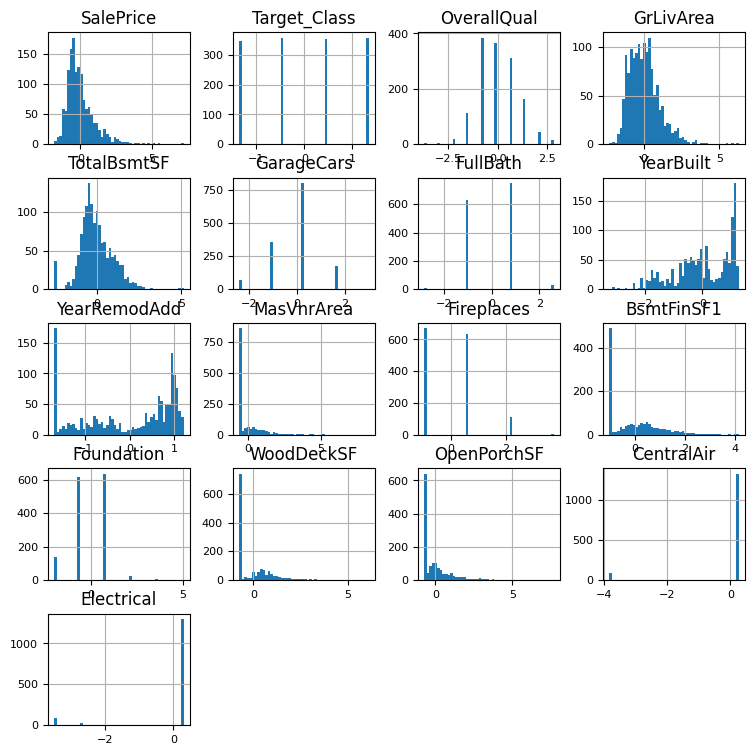

In [ ]:
df_train_SF.hist(figsize=(9, 9), bins=50, xlabelsize=8, ylabelsize=8);

After Checking the distribution of the data, we can divide the feature into two different groups based on its ditribution: Continuous distribution data and discrete data.

* The features with Continuous distribution data are: GrLivAera, TotalBsmtSF, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, WoodDeckSF, and OpenPorchSF.
* The features with discrete data are: OverallQual, GarageCars, Fullbath, Fireplace, Foundation, CentralAir, and Electrical.

In [ ]:
Continuous_Feature = df_train_SF.drop(labels=["OverallQual","GarageCars","FullBath","Fireplaces","Foundation","CentralAir","Electrical"],axis=1)
discrete_Feature = df_train_SF.drop(labels=["GrLivArea","TotalBsmtSF","YearBuilt","YearRemodAdd","MasVnrArea","BsmtFinSF1","WoodDeckSF","OpenPorchSF"],axis=1)

**Feed the data of "Continuous_Feature" into Regression model**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Continuous_Feature.drop(labels=['SalePrice','Target_Class'],axis=1),
                                                    Continuous_Feature['SalePrice'], test_size=0.2, random_state=10)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly_train , y_train)

X_poly_test = poly.transform(X_test)
y_poly_predicted = model.predict(X_poly_test)

RMS_ploy_model = mean_squared_error(y_test, y_poly_predicted, squared=False)
Regression_model_name.append("Poly_Reg_Continuous_Feature")
Regression_Accuracy.append(RMS_ploy_model)
print(f"Polynomial regression RMSE: {RMS_ploy_model}")

Polynomial regression RMSE: 0.47491904563852516


**Feed the data of discrete_Feature into the classification model**

In [ ]:
le2 = LabelEncoder()
Traget = le2.fit_transform(discrete_Feature['Target_Class'])

X_train, X_test, y_train, y_test = train_test_split(discrete_Feature.drop(labels=['SalePrice','Target_Class'],axis=1),
                                                    Traget, test_size=0.2, random_state=10)
Traget

array([2, 2, 3, ..., 2, 3, 1])

Accuracy: 0.6175438596491228

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.73      0.64        62
           1       0.63      0.34      0.44        85
           2       0.51      0.74      0.60        61
           3       0.78      0.74      0.76        77

    accuracy                           0.62       285
   macro avg       0.62      0.64      0.61       285
weighted avg       0.63      0.62      0.61       285



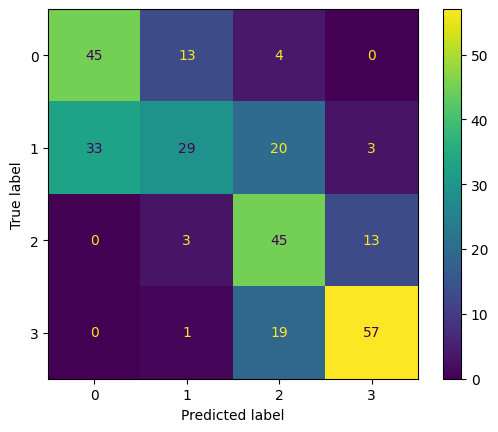

In [ ]:
MLPclf1 = MLPClassifier(hidden_layer_sizes=(200,200,4),
                        max_iter = 1000,activation = 'relu',
                        solver = 'adam')

MLPclf1.fit(X_train, y_train)
y_MLPclf_pred = MLPclf1.predict(X_test)

accuracy = accuracy_score(y_test, y_MLPclf_pred)
Classification_model_name.append("MLP discrete_Feature")
Classification_Accuracy.append(accuracy)
conf_matrix = confusion_matrix(y_test, y_MLPclf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=MLPclf.classes_)
classification_rep = classification_report(y_test, y_MLPclf_pred)

print(f'Accuracy: {accuracy}')
disp.plot()
print('\nClassification Report:')
print(classification_rep)

Accuracy: 0.631578947368421

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60        62
           1       0.61      0.51      0.55        85
           2       0.55      0.57      0.56        61
           3       0.74      0.83      0.79        77

    accuracy                           0.63       285
   macro avg       0.62      0.63      0.62       285
weighted avg       0.63      0.63      0.63       285



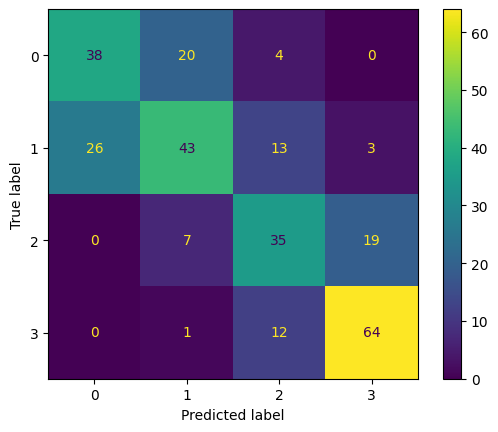

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)
y_logreg_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_logreg_pred)
Classification_model_name.append("Logistic discrete_Feature")
Classification_Accuracy.append(accuracy)

conf_matrix = confusion_matrix(y_test, y_logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=logreg.classes_)
classification_rep = classification_report(y_test, y_logreg_pred)

print(f'Accuracy: {accuracy}')
disp.plot()
print('\nClassification Report:')
print(classification_rep)

## Apply the clustering method via KMeans

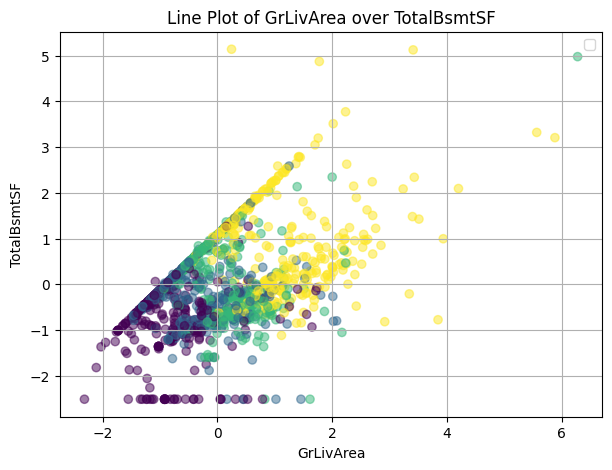

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(df_train_SF['GrLivArea'], df_train_SF['TotalBsmtSF'], c = df_train_SF['Target_Class'], alpha=0.5)
plt.title('Line Plot of GrLivArea over TotalBsmtSF')
plt.xlabel('GrLivArea')
plt.ylabel('TotalBsmtSF')
plt.legend()
plt.grid(True)
plt.show()

This diagram illustrates the relationship between "TotalBsmtSF," "GrLivArea," and "SalePrice." As evident in the figure, higher values for both X and Y are associated with higher SalePrice. To enhance model accuracy, I will group the features "TotalBsmtSF" and "GrLivArea" together using KMeans.

In [ ]:
from sklearn.cluster import KMeans
Group_data = pd.concat([df_train_SF['GrLivArea'], df_train_SF['TotalBsmtSF']], axis=1)
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(Group_data)
df_train_cluster = df_train_SF.copy()
df_train_cluster["NewClusters_1"] = kmeans.labels_
df_train_cluster = df_train_cluster.drop(labels=['GrLivArea','TotalBsmtSF'],axis=1)
df_train_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SalePrice      1422 non-null   float64
 1   Target_Class   1422 non-null   float64
 2   OverallQual    1422 non-null   float64
 3   GarageCars     1422 non-null   float64
 4   FullBath       1422 non-null   float64
 5   YearBuilt      1422 non-null   float64
 6   YearRemodAdd   1422 non-null   float64
 7   MasVnrArea     1422 non-null   float64
 8   Fireplaces     1422 non-null   float64
 9   BsmtFinSF1     1422 non-null   float64
 10  Foundation     1422 non-null   float64
 11  WoodDeckSF     1422 non-null   float64
 12  OpenPorchSF    1422 non-null   float64
 13  CentralAir     1422 non-null   float64
 14  Electrical     1422 non-null   float64
 15  NewClusters_1  1422 non-null   int32  
dtypes: float64(15), int32(1)
memory usage: 172.3 KB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##Regression with cluster

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train_cluster.drop(labels=['SalePrice','Target_Class'],axis=1),
                                                    df_train_cluster['SalePrice'], test_size=0.2, random_state=10)

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly_train_cluster  = poly.fit_transform(X_train)

poly_model_cluster = LinearRegression()
poly_model_cluster.fit(X_poly_train_cluster , y_train)

X_poly_test = poly.transform(X_test)
y_poly_predicted = poly_model_cluster.predict(X_poly_test)

RMS_ploy_model = mean_squared_error(y_test, y_poly_predicted, squared=False)
Regression_model_name.append("Poly_Regression Cluster")
Regression_Accuracy.append(RMS_ploy_model)

print(f"Polynomial regression RMSE: {RMS_ploy_model}")

Polynomial regression RMSE: 0.4692498449627973


## Classification with cluster

In [ ]:
le2 = LabelEncoder()
Traget = le2.fit_transform(df_train_cluster['Target_Class'])

X_train, X_test, y_train, y_test = train_test_split(df_train_cluster.drop(labels=['SalePrice','Target_Class'],axis=1),
                                                    Traget, test_size=0.2, random_state=10)

In [ ]:
from sklearn.neural_network import MLPClassifier

MLPclf = MLPClassifier(hidden_layer_sizes=(200,200,4),
                        max_iter = 1000,activation = 'relu',
                        solver = 'adam')

MLPclf.fit(X_train, y_train)
y_MLPclf_pred = MLPclf.predict(X_test)

accuracy = accuracy_score(y_test, y_MLPclf_pred)
Classification_model_name.append("MLP-Cluster")
Classification_Accuracy.append(accuracy)
conf_matrix = confusion_matrix(y_test, y_MLPclf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=MLPclf.classes_)
classification_rep = classification_report(y_test, y_MLPclf_pred)

print(f'Accuracy: {accuracy}')
disp.plot()
print('\nClassification Report:')
print(classification_rep)

In [ ]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)
y_logreg_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_logreg_pred)
Classification_model_name.append("Logistic-Cluster")
Classification_Accuracy.append(accuracy)

conf_matrix = confusion_matrix(y_test, y_logreg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=logreg.classes_)
classification_rep = classification_report(y_test, y_logreg_pred)

print(f'Accuracy: {accuracy}')
disp.plot()
print('\nClassification Report:')
print(classification_rep)

##Result

In [ ]:
Regression_df = pd.DataFrame()
Regression_df["Model"] = Regression_model_name
Regression_df["Accuracy"] = Regression_Accuracy

plt.figure(figsize=(12, 3))
ax = sns.barplot(data=Regression_df,x="Model",y="Accuracy", ci=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylim(0, 1)
plt.title('Model Comparison - Regression')
plt.xlabel('Model Names')
plt.ylabel('RMSE')

plt.show()

**In the chart above, the polynomial model performs the best. However, after applying the diferent method to process the training dataset, the accuracy of the model actually decreases.**

In [ ]:
Classification_df = pd.DataFrame()
Classification_df["Model"] = Classification_model_name
Classification_df["Accuracy"] = Classification_Accuracy

plt.figure(figsize=(15, 3))
ax = sns.barplot(data=Classification_df,x="Model",y="Accuracy", ci=None)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.ylim(0, 1)
plt.title('Model Comparison - Classification')
plt.xlabel('Model Names')
plt.ylabel('Accuracy')

plt.show()

**In the chart above, it can be observed that the SGD model performs the worst, while the Logistic and MLP models show similar performance. After processing the training data with different methods, the performance of each model slightly decreases.**

# 7) Conclusion and result justification [10 points]:

In the case of regression, the polynomial model performs exceptionally well, possibly due to the presence of many non-linear features in the dataset. The use of a polynomial model enhances feature extraction, leading to improved prediction accuracy. Additionally, when the dataset undergoes preprocessing techniques such as grouping or merging, some non-linear features may be removed, resulting in a decrease in accuracy.

In the classification part, all models, except for the SGD model, perform similarly. When the dataset undergoes preprocessing techniques such as grouping or merging, some non-linear features may be removed, leading to a decrease in accuracy, but still higher than the SGD model.

In summary, to further improve the model's performance, it may be necessary to consider incorporating additional diverse features. Since previous attempts focused on reducing the complexity of the data with limited success, reintroducing some of the features that were previously removed could potentially enhance the model's accuracy.